In [86]:
import empiricaldist
import janitor
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import seaborn as sns
import sklearn.metrics
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats as ss
from empiricaldist import Pmf
from empiricaldist import Cdf

In [87]:
pre_penguin_df = pd.read_csv('https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv')
pre_penguin_df.dtypes.value_counts()

float64    4
object     3
int64      1
dtype: int64

In [88]:
pre_penguin_df.shape

(344, 8)

In [89]:
(pre_penguin_df.isnull().any())

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
year                 False
dtype: bool

In [90]:
(pre_penguin_df.isnull().sum())

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

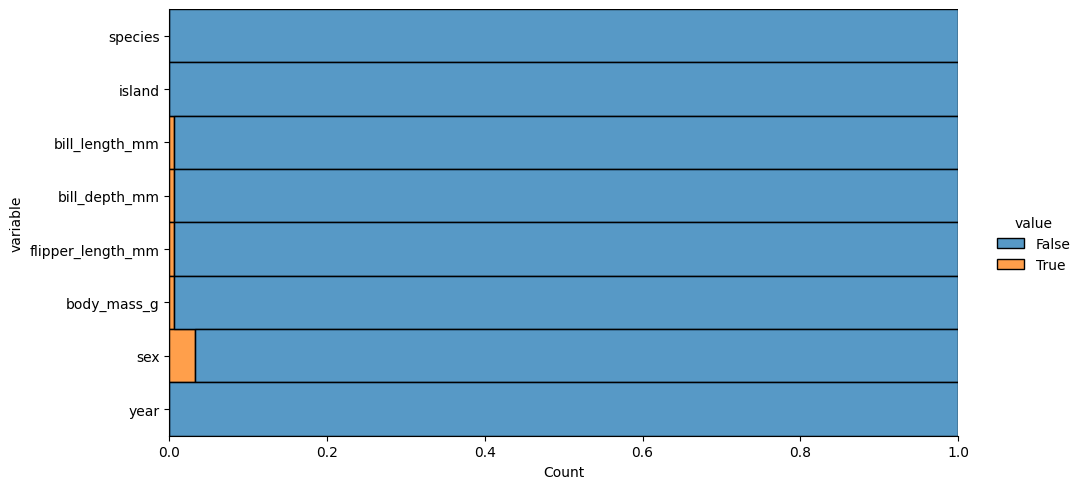

In [91]:
(pre_penguin_df
    .isnull()
    .melt()
    .pipe(
            lambda df : (
                sns.displot(
                    data= df,
                    y= 'variable',
                    hue='value',
                    multiple= 'fill',
                    aspect=2
                )
            )
    )
)

<Axes: >

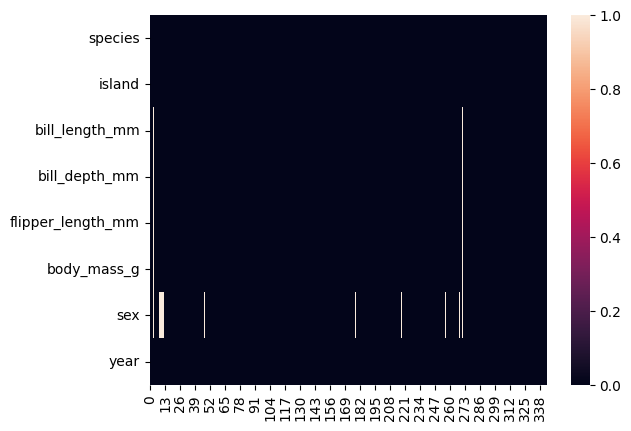

In [92]:
(
    pre_penguin_df
    .isnull()
    .transpose()
    .pipe(
        lambda df : (
            sns.heatmap(
                data= df
            )
        )
    )

)

In [93]:
df_purge = (
    pre_penguin_df
    .dropna()
)

In [94]:
df_purge.describe(include=[np.number])

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
count,333.000000,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057,2008.042042
std,5.468668,1.969235,14.015765,805.215802,0.812944
min,32.100000,13.100000,172.000000,2700.000000,2007.000000
25%,39.500000,15.600000,190.000000,3550.000000,2007.000000
50%,44.500000,17.300000,197.000000,4050.000000,2008.000000
75%,48.600000,18.700000,213.000000,4775.000000,2009.000000
max,59.600000,21.500000,231.000000,6300.000000,2009.000000


In [95]:
df_purge.describe(include=object)

,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


In [96]:
(
    df_purge.astype({
        'species' : 'category',
        'island' : 'category',
        'sex' : 'category'
    })
    .describe(include = 'category')
)



,species,island,sex
count,333,333,333
unique,3,3,2
top,Adelie,Biscoe,male
freq,146,163,168


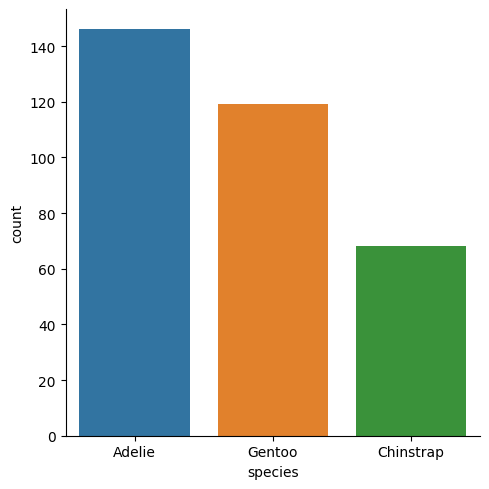

In [97]:
(
    sns.catplot(
        data = df_purge,
        x= 'species',
        kind= 'count'
    )
)

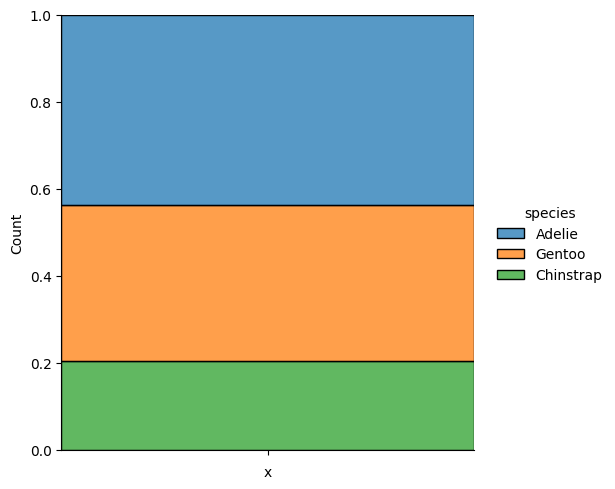

In [98]:
#OTRA FORMA
(
    df_purge
    .add_column('x', '')
    .pipe(
        lambda df : (
            sns.displot(
                data= df,
                x = 'x',
                hue='species',
                multiple= 'fill'
            )
        )
    )
)

In [99]:
PANDAS = df_purge.body_mass_g.mean()
NUMPY = np.mean(df_purge.body_mass_g)

#EN GENERAL, PUEDES CALCULAR EL PROMEDIO DE TODAS TUS VARIABLES NUMERICAS CON MEAN SIN ESPECIFICAR LA VARIABLE.
df_purge.mean()

/tmp/ipykernel_2453/3620122427.py:5: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_purge.mean()


bill_length_mm         43.992793
bill_depth_mm          17.164865
flipper_length_mm     200.966967
body_mass_g          4207.057057
year                 2008.042042
dtype: float64

In [100]:
df_purge.median()
df_purge.mode()

/tmp/ipykernel_2453/3318386277.py:1: FutureWarning: The default value of numeric_only in DataFrame.median is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_purge.median()


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Biscoe,41.1,17.0,190.0,3800.0,male,2009


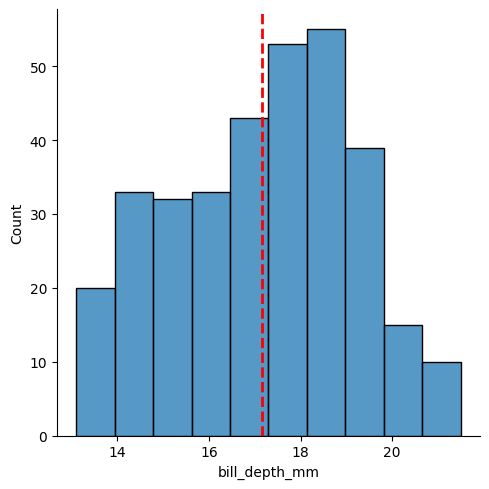

In [101]:
sns.displot(data= df_purge, x= 'bill_depth_mm', kind='hist')
plt.axvline(
    x= df_purge.bill_depth_mm.mean(),
    color = 'red',
    linestyle= 'dashed',
    linewidth= 2
)

<Axes: xlabel='bill_depth_mm'>

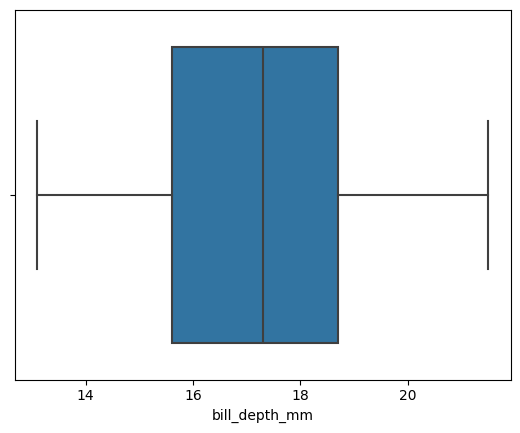

In [102]:
sns.boxplot(data=df_purge, x= 'bill_depth_mm')

FUNCIONES DE PROBABILIDAD DE MASAS

<Axes: xlabel='flipper_length_mm', ylabel='Probability'>

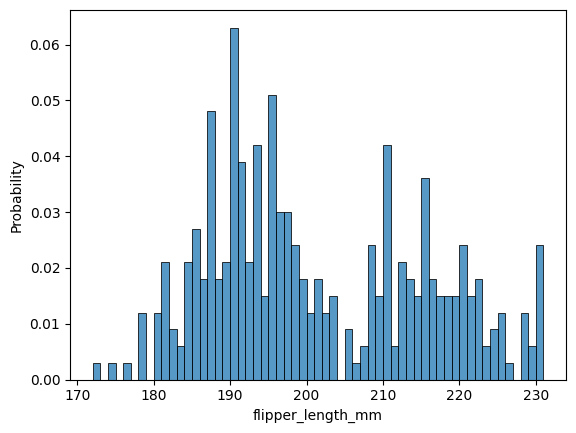

In [103]:
sns.histplot(data= df_purge, x= 'flipper_length_mm', binwidth=1, stat='probability')

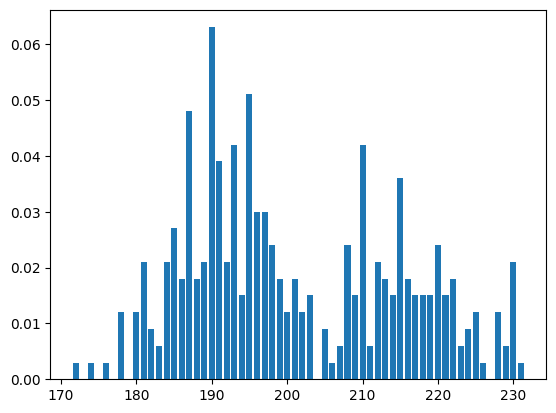

In [104]:
pmf_flipper_length_mm = empiricaldist.Pmf.from_seq(
    df_purge.flipper_length_mm,
    normalize = True
)

pmf_flipper_length_mm.bar()

In [105]:
df_purge.flipper_length_mm.max()

231.0

FUNCIONES EMPIRICAS DE PROBABILIDAD ACUMULADA ECDFs

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

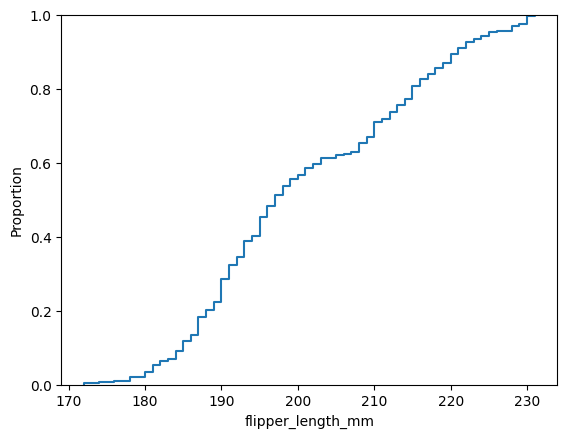

In [106]:
#SEABORN VS EMPIRICALDIST; La diferencia esta en el detallado de la información que quieres visualizar, empirical te permite ver visualizaciónes más detallladas.

sns.ecdfplot(
    data= df_purge,
    x= 'flipper_length_mm'
)

In [107]:
CDF_flipper_length_mm = Cdf.from_seq(
    df_purge.flipper_length_mm
)


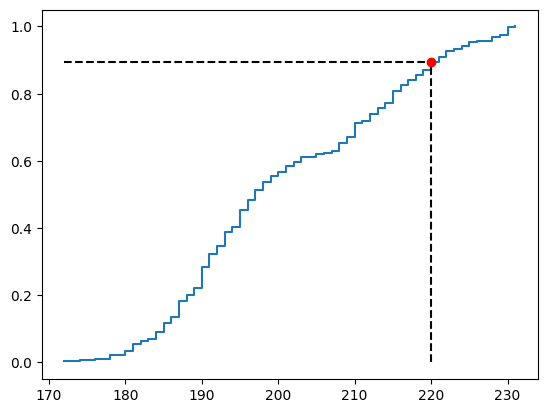

In [108]:
CDF_flipper_length_mm.step()
q=220
p = CDF_flipper_length_mm.forward(q)

plt.vlines(
    x=q,
    ymin= 0,
    ymax= p,
    color = 'black',
    linestyle = 'dashed'
)

plt.hlines(
    y= p,
    xmin = CDF_flipper_length_mm.qs[0],
    xmax= q,
    color = 'black',
    linestyle = 'dashed' 
)

plt.plot(q, p, 'ro')

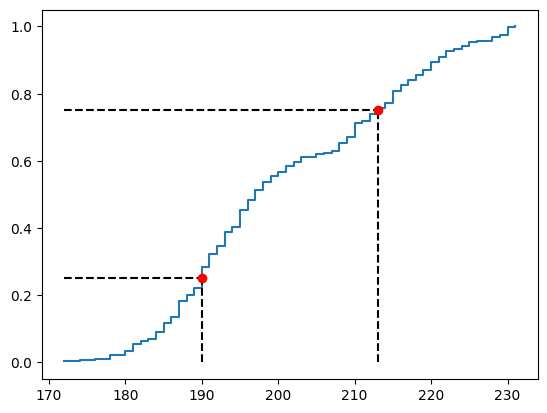

In [109]:
CDF_flipper_length_mm.step()

q25 = 0.25
q75= 0.75

iqr = (q25, q75)
qs = CDF_flipper_length_mm.inverse(iqr)

plt.vlines(
    x= qs,
    ymin= 0,
    ymax= iqr,
    color = 'black',
    linestyle= 'dashed'
)

plt.hlines(
    y= iqr,
    xmin= CDF_flipper_length_mm.qs[0],
    xmax= qs,
    color= 'black',
    linestyle= 'dashed'
)
plt.scatter(
    x= qs,
    y= iqr,
    color= 'red',
    zorder= 2
)

<Axes: xlabel='flipper_length_mm', ylabel='Proportion'>

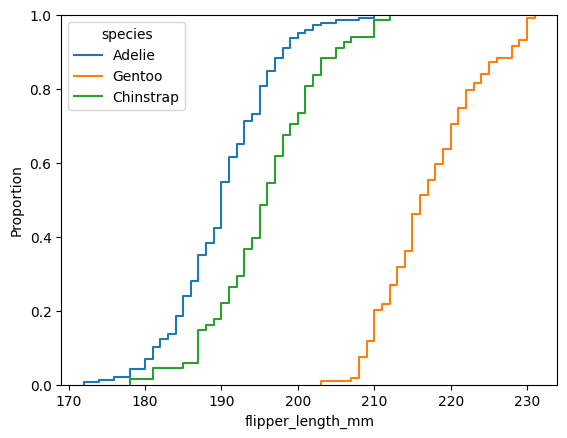

In [110]:
sns.ecdfplot(
    data = df_purge,
    x= 'flipper_length_mm',
    hue= 'species'
)

FUNCIONES DE DENSIDADA DE PROBABILIDAD

<Axes: xlabel='flipper_length_mm', ylabel='Density'>

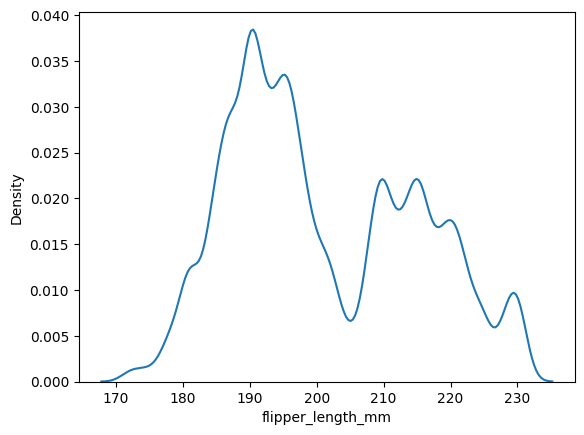

In [113]:
sns.kdeplot(
    data= df_purge,
    x= 'flipper_length_mm',
    bw_method = 0.1

)

In [115]:
stats = df_purge.body_mass_g.describe()
stats

count     333.000000
mean     4207.057057
std       805.215802
min      2700.000000
25%      3550.000000
50%      4050.000000
75%      4775.000000
max      6300.000000
Name: body_mass_g, dtype: float64

In [117]:
stats_vector = np.linspace(stats['min'], stats['max'])
stats_vector

array([2700.        , 2773.46938776, 2846.93877551, 2920.40816327,
       2993.87755102, 3067.34693878, 3140.81632653, 3214.28571429,
       3287.75510204, 3361.2244898 , 3434.69387755, 3508.16326531,
       3581.63265306, 3655.10204082, 3728.57142857, 3802.04081633,
       3875.51020408, 3948.97959184, 4022.44897959, 4095.91836735,
       4169.3877551 , 4242.85714286, 4316.32653061, 4389.79591837,
       4463.26530612, 4536.73469388, 4610.20408163, 4683.67346939,
       4757.14285714, 4830.6122449 , 4904.08163265, 4977.55102041,
       5051.02040816, 5124.48979592, 5197.95918367, 5271.42857143,
       5344.89795918, 5418.36734694, 5491.83673469, 5565.30612245,
       5638.7755102 , 5712.24489796, 5785.71428571, 5859.18367347,
       5932.65306122, 6006.12244898, 6079.59183673, 6153.06122449,
       6226.53061224, 6300.        ])

In [119]:
stats_normalize = scipy.stats.norm(stats['mean'], stats['std']).pdf(stats_vector)
stats_normalize

array([0.03062968, 0.03750714, 0.04559677, 0.05503337, 0.06595002,
       0.07847423, 0.09272368, 0.10880172, 0.12679271, 0.14675745,
       0.16872894, 0.19270856, 0.21866302, 0.24652223, 0.27617821,
       0.30748533, 0.34026168, 0.37429194, 0.40933134, 0.44511093,
       0.48134364, 0.51773123, 0.55397161, 0.58976634, 0.62482801,
       0.65888708, 0.69169814, 0.72304504, 0.752745  , 0.78065142,
       0.80665537, 0.83068579, 0.8527085 , 0.87272402, 0.89076457,
       0.90689033, 0.9211851 , 0.93375179, 0.94470779, 0.95418041,
       0.96230264, 0.96920928, 0.97503361, 0.97990453, 0.98394438,
       0.98726718, 0.98997756, 0.99217009, 0.993929  , 0.99532837])

<Axes: >

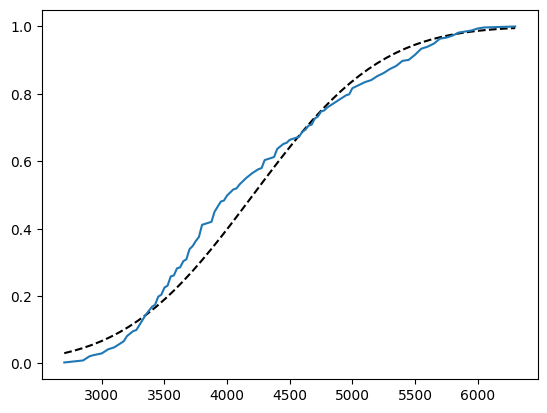

In [126]:
plt.plot(stats_vector, stats_normalize, color= 'black', linestyle= 'dashed')
empiricaldist.Cdf.from_seq(df_purge.body_mass_g, normalize= True).plot()